Name: John Edward Binay
<br>
Date submitted: 2022-03-26

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [2]:
filepath = r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 313\module 1\pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
549,4,189,110,31,0,28.5,0.680,37,0
307,0,137,68,14,148,24.8,0.143,21,0
481,0,123,88,37,0,35.2,0.197,29,0
380,1,107,72,30,82,30.8,0.821,24,0
674,8,91,82,0,0,35.6,0.587,68,0


In [5]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [5]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [7]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



Normalize the data

In [8]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [9]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [11]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

C:\Users\core i5\Documents\GitHub\DataScience\pyenv\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
18/18 [==============================] - 4s 53ms/step - loss: 0.6461 - accuracy: 0.6510 - val_loss: 0.6362 - val_accuracy: 0.6562
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6528 - val_loss: 0.6331 - val_accuracy: 0.6667
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6545 - val_loss: 0.6301 - val_accuracy: 0.6615
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.6597 - val_loss: 0.6272 - val_accuracy: 0.6667
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6317 - accuracy: 0.6562 - val_loss: 0.6245 - val_accuracy: 0.6667
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6284 - accuracy: 0.6615 - val_loss: 0.6218 - val_accuracy: 0.6719
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6632 - val_loss: 0.6192 - val_accuracy: 0.6771
Epoch 8/200


In [12]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_1 = model.predict(X_test_norm)

In [13]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [14]:
y_pred_prob_nn_1[:10]

array([[0.39504683],
       [0.61088955],
       [0.40425122],
       [0.37070423],
       [0.18361974],
       [0.52978176],
       [0.03565586],
       [0.40522537],
       [0.60855305],
       [0.28159457]], dtype=float32)

Create the plot_roc function

In [15]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.792
roc-auc is 0.821


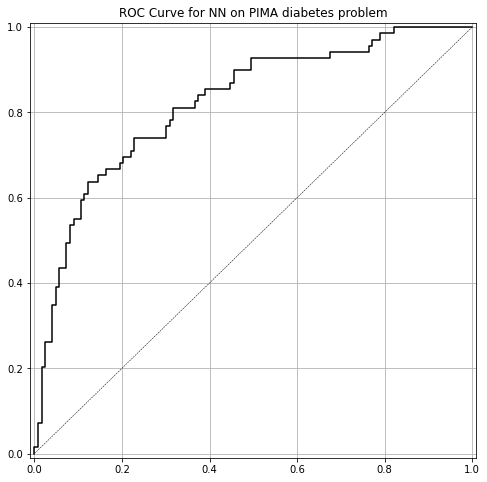

In [16]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [17]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

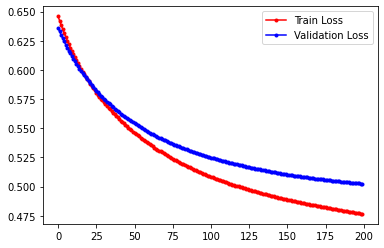

In [18]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

As one would expect both the validation and training loss did end up decreasing over the epochs. The training loss is likely to see a steeper decline and ending up lower than the loss for validation because the training dataset is what we are working on and traiing the model on, so the model has learned the patterns in the training data. The validation dataset is seen by the model for the first time, it may have characteristics and patterns that the model hasn't been trained on, so that's why accuracy is highier for the training dataset as well as lower in loss when compared to the validation dataset. 

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures. 
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#### model_2 metrics

In [19]:
model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_2.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 13ms/step - loss: 0.6464 - accuracy: 0.6545 - val_loss: 0.6692 - val_accuracy: 0.6406
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.6545 - val_loss: 0.6660 - val_accuracy: 0.6406
Epoch 3/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6545 - val_loss: 0.6629 - val_accuracy: 0.6406
Epoch 4/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6545 - val_loss: 0.6600 - val_accuracy: 0.6406
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.6545 - val_loss: 0.6571 - val_accuracy: 0.6406
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6545 - val_loss: 0.6543 - val_accuracy: 0.6406
Epoch 7/1500
18/18 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6545 - val_loss: 0.6516 - val_accuracy: 0.6406
Epoch

In [20]:
y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

accuracy is 0.776
roc-auc is 0.828


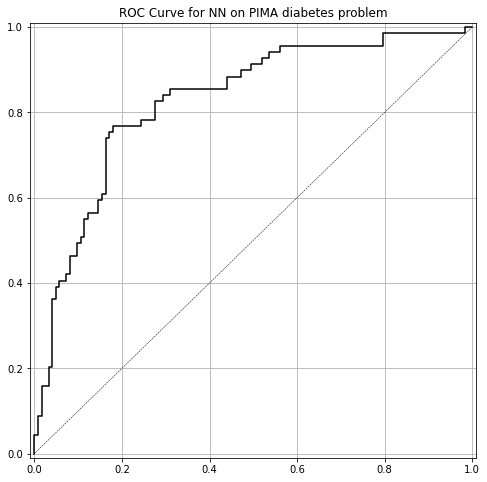

In [21]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

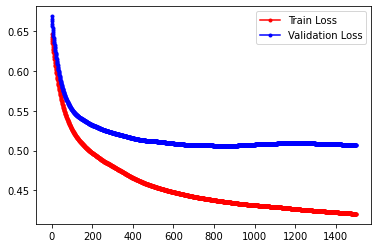

In [22]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#### model_3 metrics

changes:
* two layers with 24 nodes, both have rely activation functions
* adam as optimizer with 0.001 learning rate
* epochs = 500

In [23]:
model_3 = Sequential([
    Dense(24, input_shape=(8,), activation="relu"),
    Dense(24, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_3.compile(Adam(learning_rate = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)
y_pred_class_nn_3 = (model_3.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_3 = model_3.predict(X_test_norm)

Epoch 1/500
18/18 [==============================] - 2s 19ms/step - loss: 0.7596 - accuracy: 0.3941 - val_loss: 0.6848 - val_accuracy: 0.4948
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6615 - val_loss: 0.6200 - val_accuracy: 0.6875
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.7378 - val_loss: 0.5848 - val_accuracy: 0.7500
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5566 - accuracy: 0.7361 - val_loss: 0.5559 - val_accuracy: 0.7604
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5269 - accuracy: 0.7500 - val_loss: 0.5349 - val_accuracy: 0.7552
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7500 - val_loss: 0.5184 - val_accuracy: 0.7500
Epoch 7/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4871 - accuracy: 0.7622 - val_loss: 0.5066 - val_accuracy: 0.7604
Epoch 8/500


accuracy is 0.760
roc-auc is 0.783


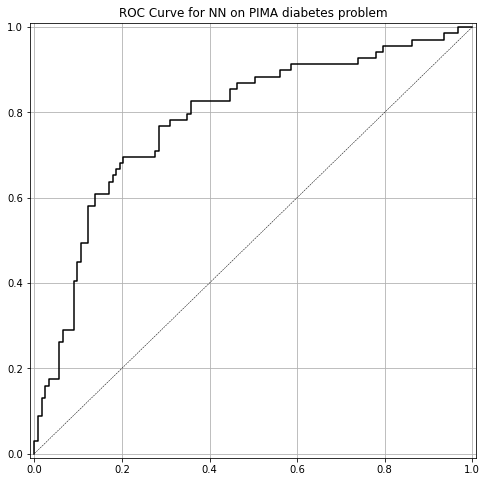

In [24]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

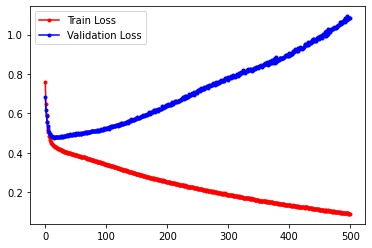

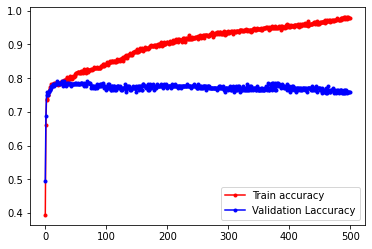

In [26]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation Laccuracy")
ax.legend()


#### model_4
changes:
* created three hidden layers with 12 nodes each with relu for the activation functions
* learning rate = 0.003
* optimizer is RMSprop
* epochs = 1000

In [28]:
model_4 = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])
model_4.compile(RMSprop(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)
y_pred_class_nn_4 = (model_4.predict(X_test_norm) > 0.5).astype(int)
y_pred_prob_nn_4 = model_4.predict(X_test_norm)

Epoch 1/1000
18/18 [==============================] - 2s 20ms/step - loss: 0.6191 - accuracy: 0.6667 - val_loss: 0.5952 - val_accuracy: 0.6875
Epoch 2/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.5464 - accuracy: 0.7153 - val_loss: 0.5544 - val_accuracy: 0.7031
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7344 - val_loss: 0.5390 - val_accuracy: 0.7031
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4733 - accuracy: 0.7465 - val_loss: 0.5365 - val_accuracy: 0.6979
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4577 - accuracy: 0.7517 - val_loss: 0.5148 - val_accuracy: 0.7552
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.7569 - val_loss: 0.5168 - val_accuracy: 0.7396
Epoch 7/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4412 - accuracy: 0.7743 - val_loss: 0.5126 - val_accuracy: 0.7500
Epoch

accuracy is 0.724
roc-auc is 0.785


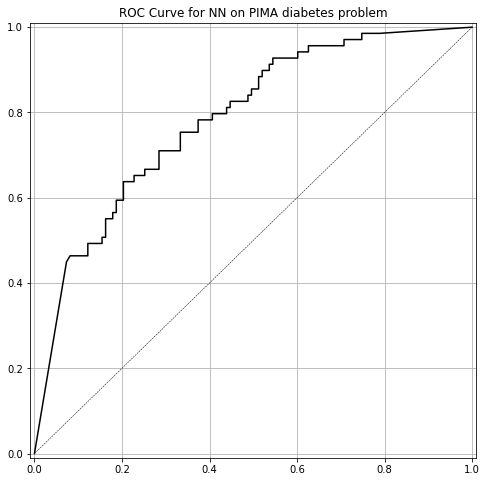

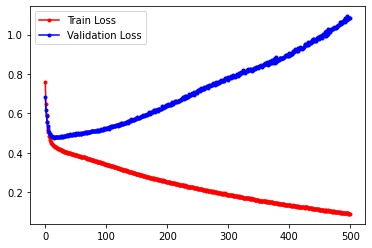

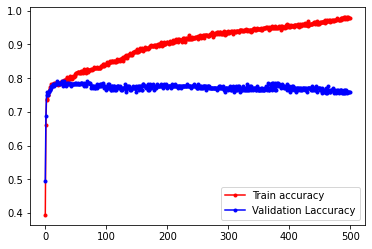

In [29]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_4)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_4)))

plot_roc(y_test, y_pred_prob_nn_4, 'NN')

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["accuracy"],'r', marker='.', label="Train accuracy")
ax.plot(run_hist_3.history["val_accuracy"],'b', marker='.', label="Validation Laccuracy")
ax.legend()

#### Conclusion

The modifications for model_2 produced subpar results compared to the model in the acitivity. Both the accuracy and the ROC-AUC score is lowered, though by not a significant amount. The training and validation loss is the real problem. It took way longer time and iteration for model_2 to reach the same kind of loss for both datasets when compared with model_1 (the model used in the activity).

model_3 had a worse metrics compared to model_1. There was a decrease in accuracy and roc-auc scoe for the model_3. Training and validation loss gave a funny-looking graph. The loss started off great for both datasets and continue to decline for the training dataset. However, the complete opposite is true for the validation dataset. The test/validation loss continued to increase with every iteration. 

model_4 is the worst model so far. It's metrics are: 
* accuracy is 0.693
* roc-auc is 0.748

The training and validation loss is similar to what happened with model_3. Training loss decreases while validation loss continues to increase. For some reason the valiation loss started to increase into 1+ territory after around 200 iterations. 